In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('IMDb Movies India.csv' ,encoding='iso-8859-1')

# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


In [2]:
print(data.describe())

               Year       Rating
count  14981.000000  7919.000000
mean   -1987.012215     5.841621
std       25.416689     1.381777
min    -2022.000000     1.100000
25%    -2009.000000     4.900000
50%    -1991.000000     6.000000
75%    -1968.000000     6.800000
max    -1913.000000    10.000000


In [3]:

# Data Preprocessing
# Handle missing values
data.isnull()
  # This is just an example, handle missing values as appropriate


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [4]:
data.dropna(inplace=True)

In [5]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [6]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)


In [7]:
# X.head()

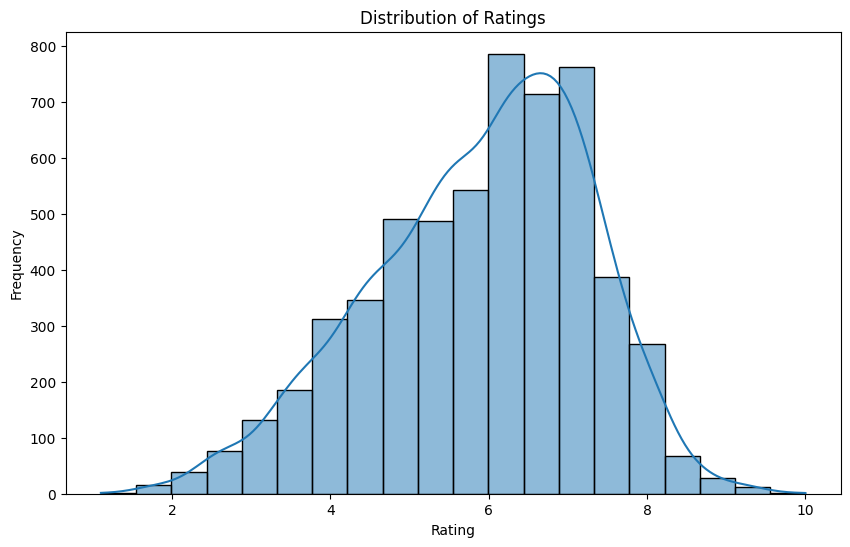

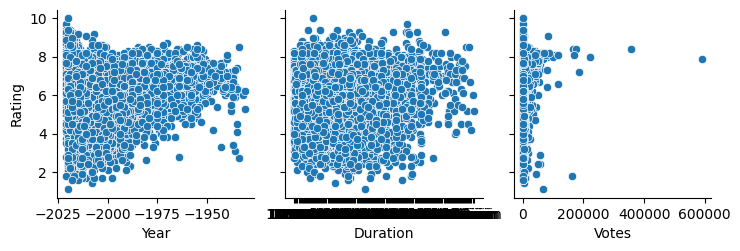

In [8]:
# Visualize the distribution of ratings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features and rating
sns.pairplot(data, x_vars=['Year', 'Duration', 'Votes'], y_vars='Rating', kind='scatter')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a label encoder for categorical features
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Director'] = label_encoder.fit_transform(data['Director'])

# Extract and label encode actor names
actor_columns = ['Actor 1', 'Actor 2', 'Actor 3']
for col in actor_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Create a new DataFrame with extracted features
# features = data[['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
# target = data['Rating']


In [11]:
# Convert categorical variables to numeric using one-hot encoding
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)



In [12]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Rating' ,'Duration','Name'])  # Features
y = data['Rating']  # Target

In [16]:
X.head()

,Year,Votes,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,...,Actor 3_2546,Actor 3_2547,Actor 3_2548,Actor 3_2549,Actor 3_2550,Actor 3_2551,Actor 3_2552,Actor 3_2553,Actor 3_2554,Actor 3_2555
1,-2019.0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-2019.0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1997.0,827,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-2005.0,1086,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-2012.0,326,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor()

# Train models
linear_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# Evaluate models
linear_reg_pred = linear_reg.predict(X_test)
random_forest_pred = random_forest_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)

print("Linear Regression MSE:", linear_reg_mse)
print("Random Forest Regression MSE:", random_forest_mse)


Linear Regression MSE: 8249878495359.262
Random Forest Regression MSE: 1.2428066466431091


In [15]:
# After processing the data and training the model

# Save the best model (Random Forest)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(random_forest_reg, model_file)

# Save the column names used in training
with open('column_names.pkl', 'wb') as column_names_file:
    pickle.dump(X.columns.tolist(), column_names_file)
